# Intro to statistics with `R`

This is your first exercise notebook. 
The exercises are similar to what you have seen in lab and practice notebook with a few exercises designed to be a bit challenging. 
You should explore and find commands to solve the exercises.   

Much of the content will be similar to your lab and practice notebook. 
Both notebooks will help you as a guide post in working out the solutions. 

## Read in the Data

For this exercise we will use some Bike Share data.

In [1]:
bikeshare_hour <- read.csv('/dsa/data/all_datasets/bikeshare/hour.csv')

**Activity 1**: Find the dimensions (the number of rows and columns) of the data frame.

In [2]:
# Code for Activity 1 goes here 
# ------------------------------
dim(bikeshare_hour)

[1] 17379    17

**Activity 2**: Display the ***last*** 10 rows of the data frame.

In [4]:
# Code for Activity 2 goes here 
# ------------------------------
tail(bikeshare_hour, 10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
17370,17370,2012-12-31,1,1,12,14,0,1,1,2,0.28,0.2727,0.45,0.2239,62,185,247
17371,17371,2012-12-31,1,1,12,15,0,1,1,2,0.28,0.2879,0.45,0.1343,69,246,315
17372,17372,2012-12-31,1,1,12,16,0,1,1,2,0.26,0.2576,0.48,0.1940,30,184,214
17373,17373,2012-12-31,1,1,12,17,0,1,1,2,0.26,0.2879,0.48,0.0896,14,150,164
17374,17374,2012-12-31,1,1,12,18,0,1,1,2,0.26,0.2727,0.48,0.1343,10,112,122
17375,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17378,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Activity 3**: Run summary command learned in lab and identify **each variable** if it is discrete or continuous.

In [5]:
# Code for Activity 3 goes here 
# ------------------------------
summary(bikeshare_hour)

    instant         dteday              season            yr        
 Min.   :    1   Length:17379       Min.   :1.000   Min.   :0.0000  
 1st Qu.: 4346   Class :character   1st Qu.:2.000   1st Qu.:0.0000  
 Median : 8690   Mode  :character   Median :3.000   Median :1.0000  
 Mean   : 8690                      Mean   :2.502   Mean   :0.5026  
 3rd Qu.:13034                      3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :17379                      Max.   :4.000   Max.   :1.0000  
      mnth              hr           holiday           weekday     
 Min.   : 1.000   Min.   : 0.00   Min.   :0.00000   Min.   :0.000  
 1st Qu.: 4.000   1st Qu.: 6.00   1st Qu.:0.00000   1st Qu.:1.000  
 Median : 7.000   Median :12.00   Median :0.00000   Median :3.000  
 Mean   : 6.538   Mean   :11.55   Mean   :0.02877   Mean   :3.004  
 3rd Qu.:10.000   3rd Qu.:18.00   3rd Qu.:0.00000   3rd Qu.:5.000  
 Max.   :12.000   Max.   :23.00   Max.   :1.00000   Max.   :6.000  
   workingday       weathersit         te

**So what is the most common type of weather that happens?**

**Activity 4**: Find out the most common type of weather that occurs in the dataset.

In [12]:
# Code for Activity 4 goes here
# -------------------------------    
print(table(bikeshare_hour$weathersit))

# Create mode function
getmode <- function(v) {
   uniqv <- unique(v)
   # Count number of times value occurts then returns the largest 
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Create vector with weather types
v <- c(bikeshare_hour$weathersit)
# Calculate mode using function
mode <- getmode(v)
# Store mode as var
mode = mode

paste('Most common type of weather is:', mode)


    1     2     3     4 
11413  4544  1419     3 


[1] "Most common type of weather is: 1"

We have seen how to calculate z-score in the lab and how to use it in testing a hypothesis. 
Let’s say, we want to check the significance of variable `weekday` for hypothesis testing. 
Assuming monday(weekday=1) has more bike shares than average population bike shares on any other day


Null hypothesis $H_0$:   
There is no significant difference in the number of bike shares for Monday versus any other day of the week.

Alternate hypothesis $H_1$:  
There is a better chance of monday having more bike shares on average than average bike shares on other days.

**Activity 5.a**: Calculate the z-score based on `weekday` variable.

In [18]:
# Code for Activity 5 goes here
# -------------------------------    
mondays <- subset(bikeshare_hour, weekday == 1)
other_days <- subset(bikeshare_hour, weekday != 1)
num_mondays = nrow(mondays)
#print(mondays)
#print(other_days)
#print(num_mondays)

sample_mean = mean(mondays$cnt)
pop_mean = mean(other_days$cnt)
pop_var = var(other_days$cnt)
std = sqrt(pop_var) / sqrt(num_mondays)
print(paste("Sample mean:", sample_mean))
print(paste("Population mean:", pop_mean))
print(paste("Population variance:", pop_var))
print(paste("Standard deviation:", std))
zscore = (sample_mean - pop_mean) / std
print(paste("Z-score:", zscore))

[1] "Sample mean: 183.744655102864"
[1] "Population mean: 190.414496644295"
[1] "Population variance: 33009.7762312051"
[1] "Standard deviation: 3.64907699300099"
[1] "Z-score: -1.82781606258902"


**Activity 5.b**: Use the z-score obtained in 5.a to accept or reject null hypothesis $H_0$. 
Explain why it is accepted or rejected below.

In [37]:
# Answer for activity 5.b goes here
# -------------------------------   
# Calculate the Z-score based on inverse score (1.83) from the given table
table_area = 1 - 0.9664
tail_area = 1 - table_area
pvalue = 2 * tail_area

paste("Table area:", table_area)
paste("Tail area:", tail_area)
paste("p-value:", pvalue)

[1] "Table area: 0.0336"

[1] "Tail area: 0.9664"

[1] "p-value: 1.9328"

Let's say we were interested in analyzing patters on weekdays and weekends. 

**Activity 6**: Divide the data set into two different subsets. 
All rows where the `weekday = 1,2,3,4,5` should be in one set and all days where `weekday = 0,6` should be another set.

Hint: You can use `|` operator to satisfy multiple conditions in an if condition.

In [40]:
# Code for Activity 6 goes here
# -------------------------------    
weekends <- subset(bikeshare_hour, weekday == 0 | weekday == 6)
weekdays <- subset(bikeshare_hour, weekday != 0 & weekday != 6)

#weekends
#unique(weekends$weekday)
#weekdays
#unique(weekdays$weekday)

Let's say we were interested in analyzing the weather situation on working days. 

**Activity 7**: Find the distribution of data based `weathersit` and `workingday`.

Hint: Look at `table()` command.

In [44]:
# Code for Activity 7  goes here
# -------------------------------    
# Doesn't work because there are holidays that fall on weekdays
# table(weekdays$weathersit, weekdays$workingday)

# Create freq table based on two columns then convert to dataframe
df <- as.data.frame(table(bikeshare_hour$weathersit, bikeshare_hour$workingday))
# Change column names
names(df) <- c("Weather", "Work.Day", "Freq")
df
# # Excludes weekends and holidays
# df[df$Work.Day != 1, ]

Weather,Work.Day,Freq
<fct>,<fct>,<int>
1,0,3781
2,0,1353
3,0,379
4,0,1
1,1,7632
2,1,3191
3,1,1040
4,1,2


**Activity 8**: Identify the datatype of each variable in bikeshare_hour dataframe.

Hint: Use class().

In [45]:
# Code for Activity 8  goes here
# -------------------------------    
sapply(bikeshare_hour, class)

instant      dteday      season          yr        mnth          hr 
  "integer" "character"   "integer"   "integer"   "integer"   "integer" 
    holiday     weekday  workingday  weathersit        temp       atemp 
  "integer"   "integer"   "integer"   "integer"   "numeric"   "numeric" 
        hum   windspeed      casual  registered         cnt 
  "numeric"   "numeric"   "integer"   "integer"   "integer"

**Activity 9**: Check the **structure** of bikeshare_hour dataframe. 
Look up for the command which returns the structure of a dataframe.

In [46]:
# Code for Activity 9   goes here
# -------------------------------    
str(bikeshare_hour)

'data.frame':	17379 obs. of  17 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : chr  "2011-01-01" "2011-01-01" "2011-01-01" "2011-01-01" ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hr        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 6 6 6 6 6 6 6 6 6 ...
 $ workingday: int  0 0 0 0 0 0 0 0 0 0 ...
 $ weathersit: int  1 1 1 1 1 2 1 1 1 1 ...
 $ temp      : num  0.24 0.22 0.22 0.24 0.24 0.24 0.22 0.2 0.24 0.32 ...
 $ atemp     : num  0.288 0.273 0.273 0.288 0.288 ...
 $ hum       : num  0.81 0.8 0.8 0.75 0.75 0.75 0.8 0.86 0.75 0.76 ...
 $ windspeed : num  0 0 0 0 0 0.0896 0 0 0 0 ...
 $ casual    : int  3 8 5 3 0 0 2 1 1 8 ...
 $ registered: int  13 32 27 10 1 1 0 2 7 6 ...
 $ cnt       : int  16 40 32 13 1 1 2 3 8 14 ...


Let's see if people are more interested in riding the bike on weekdays or weekends. 

**Activity 10:** Find out if people are more interested in riding the bike on weekdays or weekends. 
Find the average number of instances for weekdays and weekends.

In [47]:
# Code for Activity 10   goes here
# -------------------------------    
weekend_shares <- mean(weekends$cnt)
weekday_shares <- mean(weekdays$cnt)

paste("Average weekend bike shares:", weekend_shares)
paste("Average weekday bike shares:", weekday_shares)
# This is surprising

[1] "Average weekend bike shares: 183.852014359793"

[1] "Average weekday bike shares: 191.738374443995"

**Activity 11:** Display the row when maximum number of bikes were shared in the hour.

In [48]:
# Code for Activity 11   goes here
# -------------------------------    
bikeshare_hour[which.max(bikeshare_hour$cnt), ]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
14774,14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977


Lets do some data cleaning before taking up the next activity

In [49]:
#First get the count of total bike shares based on each hour of the day and weekday. Run the code below
hour_sums=t(tapply(bikeshare_hour$cnt, bikeshare_hour$hr,sum))
day_sums=t(tapply(bikeshare_hour$cnt, bikeshare_hour$weekday,sum))

The `tapply()` definition from R-manual: 

Apply a function to each cell of a ragged array, 
that is to each (non-empty) group of values given by a unique combination of the levels of certain factors.

Suggested reading: [tapply()](https://www.r-bloggers.com/r-function-of-the-day-tapply-2/)

Simply put, in our example of hour_sums variable, 
the data is partitioned based on the second parameter, `bikeshare_hour$hr.` 
So 24 subsets are created for each hour(0 to 23). 
The 3rd argument can be any function(sum,mean,median etc) 
which is applied on the first parameter of tapply function. 
Since now we have 24 subsets, we are performing `sum(bikeshare_hour$cnt)` on this 24 subsets of data for each hour.


The `t()` is used to return the transpose of the input dataframe or matrix. 
Jupyter has issues rendering `tapply()` output, so `t()` is a workaround to display the output correctly.

More information on [t()](https://stat.ethz.ch/R-manual/R-devel/library/base/html/t.html)

If you check the dimensions of `hour_sums` and `day_sums` variables they are dataframes. 
But we want the output in the form of a vector. 
So how can we convert a dataframe to a vector?

In [50]:
#The above piece of code returns dataframes as output. Check the dimensions and class to verify. Run the code below.
dim(hour_sums)
dim(day_sums)
class(hour_sums)
class(day_sums)

[1]  1 24

[1] 1 7

[1] "matrix" "array"

[1] "matrix" "array"

R has builtin function to convert data format between dataframes,matrices and vectors. 
You can change the data type and also check if certain object is actually a dataframe 
or matrix or a vector using functions like `is.dataframe()` etc.

In [51]:
#Convert the dataframes hour_sums, day_sums into a matrix and then into arrays. Run the code below.
hour_sums=as.vector(as.matrix(hour_sums))
day_sums=as.vector(as.matrix(day_sums))
hour_sums
day_sums

[1]  39130  24164  16352   8174   4428  14261  55132 154171 261001 159438
[11] 126257 151320 184414 184919 175652 183149 227748 336860 309772 226789
[21] 164550 125445  95612  63941

[1] 444027 455503 469109 473048 485395 487790 477807

## Distributions

Lets peek into the distribution of different variables and see how they are distributed.

**Activity 12:** Plot a bar plot for bike shares for each hour of the day and weekday.
Use `hour_sums` and `day_sums` vectors we created above to plot the graphs. 
Combine this plots using the `par()` or `layout()` command for analyzing them easily.


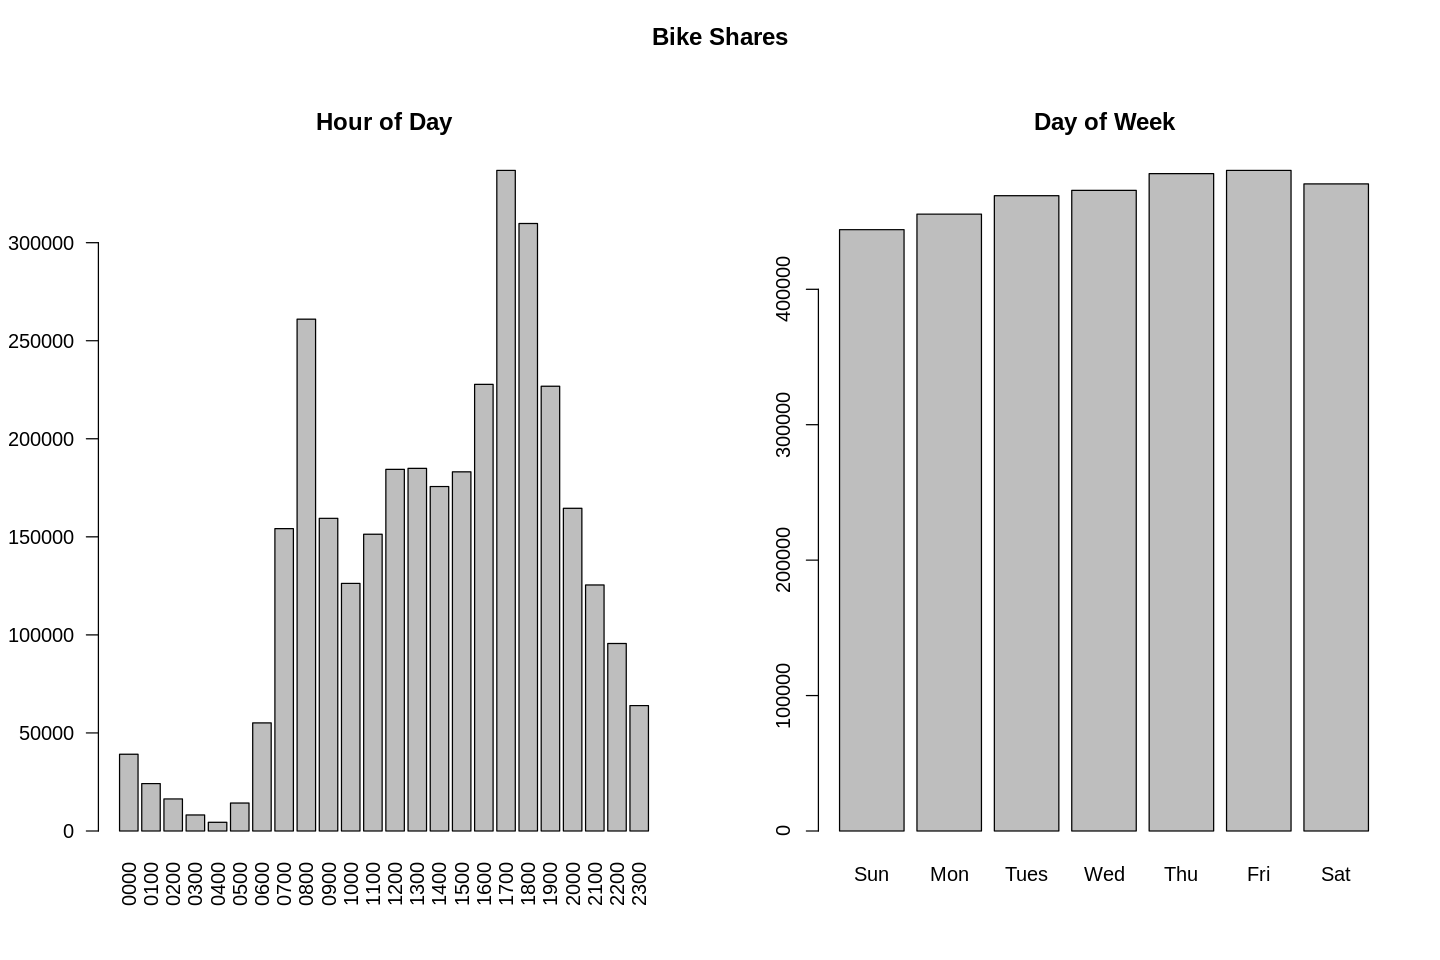

In [90]:
# Code for activity 12 goes gere 
# Uncomment below if you want to supress scientific notation of numbers.
library(repr)

names(hour_sums) <- c("0000", "0100", "0200", "0300", "0400", "0500", "0600", "0700", "0800", "0900", "1000", "1100", "1200", 
                      "1300", "1400", "1500", "1600", "1700", "1800", "1900", "2000", "2100", "2200", "2300")
names(day_sums) <- c("Sun", "Mon", "Tues", "Wed", "Thu", "Fri", "Sat")

options(scipen=999)
options(repr.plot.width = 16, repr.plot.height = 10)
par(oma = c(0, 0, 3, 0),
    mfrow = c(1, 2))
barplot(hour_sums, main = "Hour of Day", las = 2)
barplot(day_sums, main = "Day of Week")
title('Bike Shares', outer = TRUE, cex.main = 2)

The plots tell a clear story.
The peak hour of bike shares is at the 17- and 18-hour every day. 
Additionally, Thurdays and Fridays are popular for bike shares in a week. 
This is contradicting with what we saw in activity 10 where average number of instances of bike shares are more on weekends. 
Lets see the average number of users who rent the bike on each day of the week.

In [91]:
day_sums

Sun    Mon   Tues    Wed    Thu    Fri    Sat 
444027 455503 469109 473048 485395 487790 477807

**Activity 13:** Plot a boxplot for `cnt` against each weekday

In [67]:
#Code for activity 13 goes here
# -------------------------------    
boxplot(weekday, data=bikeshare_hour, main="Bike Shares", xlab="Auto-mpg dataset", ylab="Miles Per Gallon")
boxplot(bikeshare_hour$cnt~bikeshare_hour$weekday, data = bikeshare_hour, range = 4)




ERROR: Error in parse(text = x, srcfile = src): <text>:3:6: unexpected string constant
2: # -------------------------------    
3: less "path/to/readme.txt"
        ^


**Activity 14:** Plot histograms for variables `casual`, `registered` and `cnt` and see how they are distributed.  
Plot mean and median on the histograms. 

In [ ]:
#Code for activity 14 goes here
# -------------------------------    





# SAVE YOUR NOTEBOOK